# 1. Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# 2. Load and Preprocess the Dataset

In [2]:
dataset_dir = 'horh'  # Folder containing "horse" and "human" subfolders

# Data augmentation and normalization
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Training data generator
train_data = datagen.flow_from_directory(dataset_dir, target_size=(150, 150), batch_size=32, 
                                         class_mode='binary', subset='training')

# Testing/validation data generator
test_data = datagen.flow_from_directory(dataset_dir, target_size=(150, 150), batch_size=32, 
                                        class_mode='binary', subset='validation')


Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


# 3. Visualize Some Samples

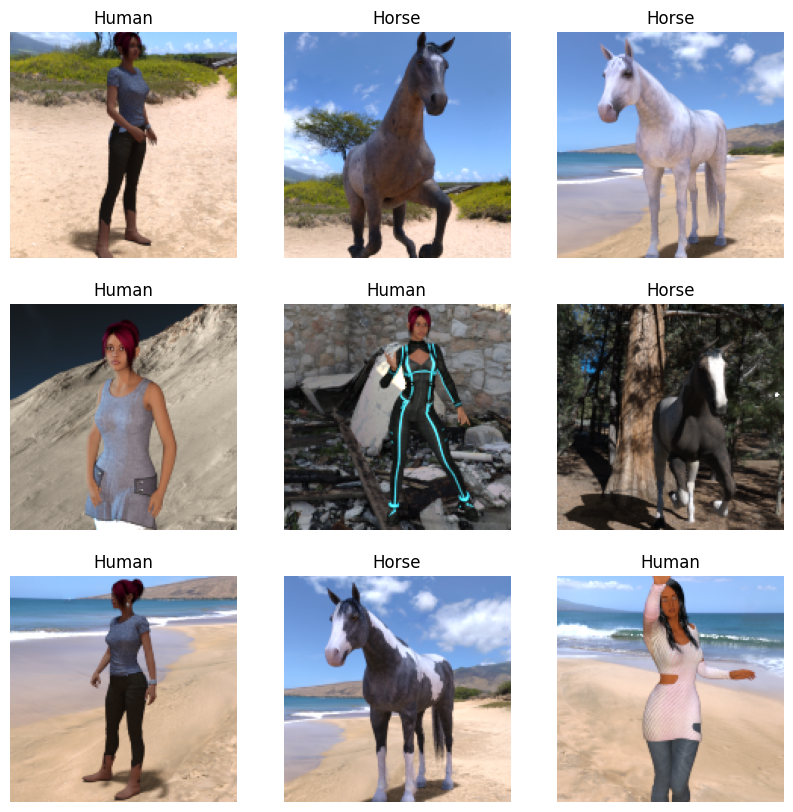

In [5]:
def visualize_samples(data):
    data.reset()
    plt.figure(figsize=(10, 10))
    for i in range(9):
        images, labels = next(data)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title('Horse' if labels[i] == 0 else 'Human')
        plt.axis('off')
    plt.show()

visualize_samples(train_data)

# 4. Set Up Pre-trained Models (VGG16 and ResNet50)

In [6]:
def create_vgg16_model():
    base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model layers

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

In [7]:
def create_resnet50_model():
    base_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model layers

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# 5. Compile and Train Models with Different Hyperparameters

In [8]:
vgg16_model = create_vgg16_model()
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                    loss='binary_crossentropy', metrics=['accuracy'])

history_vgg16 = vgg16_model.fit(train_data, epochs=10, validation_data=test_data)

c:\Users\Harsh\OneDrive\Desktop\Semester 7\Deep Learning - Tcp\Lab\Mid-model Exam\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 193s 7s/step - accuracy: 0.5183 - loss: 0.7679 - val_accuracy: 0.4634 - val_loss: 0.7067
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 168s 7s/step - accuracy: 0.5646 - loss: 0.6735 - val_accuracy: 0.6000 - val_loss: 0.6620
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.7158 - loss: 0.5819 - val_accuracy: 0.6780 - val_loss: 0.6229
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 155s 6s/step - accuracy: 0.7836 - loss: 0.5269 - val_accuracy: 0.7122 - val_loss: 0.5910
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - accuracy: 0.8330 - loss: 0.4862 - val_accuracy: 0.7024 - val_loss: 0.5678
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.8815 - loss: 0.4368 - val_accuracy: 0.7122 - val_loss: 0.5493
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.8946 - loss: 0.3916 - val_accuracy: 0.6927 - val_loss: 0.5394
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.9275 - loss: 0.3425 - val_accuracy: 0.7073 - v

In [9]:
resnet50_model = create_resnet50_model()
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                       loss='binary_crossentropy', metrics=['accuracy'])

history_resnet50 = resnet50_model.fit(train_data, epochs=10, validation_data=test_data)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.5348 - loss: 0.7387 - val_accuracy: 0.4537 - val_loss: 0.6929
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.5166 - loss: 0.7408 - val_accuracy: 0.6537 - val_loss: 0.6888
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.4918 - loss: 0.7508 - val_accuracy: 0.6146 - val_loss: 0.6865
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.5389 - loss: 0.7304 - val_accuracy: 0.5415 - val_loss: 0.6840
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.5209 - loss: 0.7226 - val_accuracy: 0.5610 - val_loss: 0.6817
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.5451 - loss: 0.6910 - val_accuracy: 0.6000 - val_loss: 0.6771
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.5885 - loss: 0.6610 - val_accuracy: 0.7463 - val_loss: 0.6729
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.6

# 6. Fine-tune the Pre-trained Models

In [10]:
vgg16_model.trainable = True  # Unfreeze all layers
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
                    loss='binary_crossentropy', metrics=['accuracy'])

history_vgg16_fine = vgg16_model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.9502 - loss: 0.2691 - val_accuracy: 0.7122 - val_loss: 0.5132
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 165s 6s/step - accuracy: 0.9402 - loss: 0.2616 - val_accuracy: 0.7122 - val_loss: 0.5127
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.9488 - loss: 0.2518 - val_accuracy: 0.7122 - val_loss: 0.5124
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.9706 - loss: 0.2494 - val_accuracy: 0.7122 - val_loss: 0.5138
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 187s 7s/step - accuracy: 0.9465 - loss: 0.2487 - val_accuracy: 0.7122 - val_loss: 0.5141


In [11]:
resnet50_model.trainable = True  # Unfreeze all layers
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
                       loss='binary_crossentropy', metrics=['accuracy'])

history_resnet50_fine = resnet50_model.fit(train_data, epochs=5, validation_data=test_data)


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.6235 - loss: 0.6518 - val_accuracy: 0.6000 - val_loss: 0.6641
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.6164 - loss: 0.6533 - val_accuracy: 0.6098 - val_loss: 0.6635
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6165 - loss: 0.6492 - val_accuracy: 0.6488 - val_loss: 0.6625
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6343 - loss: 0.6410 - val_accuracy: 0.6049 - val_loss: 0.6630
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6568 - loss: 0.6296 - val_accuracy: 0.5951 - val_loss: 0.6625


# 7. Evaluate Models on Test Data with Confusion Matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step


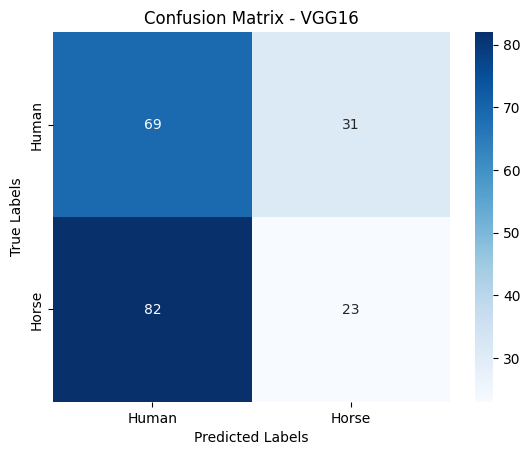

VGG16 Test Accuracy: 44.88%


In [12]:
test_data.reset()
predictions_vgg16 = (vgg16_model.predict(test_data) > 0.5).astype("int32")
true_labels = test_data.classes

conf_matrix_vgg16 = confusion_matrix(true_labels, predictions_vgg16)
sns.heatmap(conf_matrix_vgg16, annot=True, fmt="d", cmap='Blues', xticklabels=['Human', 'Horse'], yticklabels=['Human', 'Horse'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - VGG16')
plt.show()

accuracy_vgg16 = accuracy_score(true_labels, predictions_vgg16)
print(f"VGG16 Test Accuracy: {accuracy_vgg16 * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step


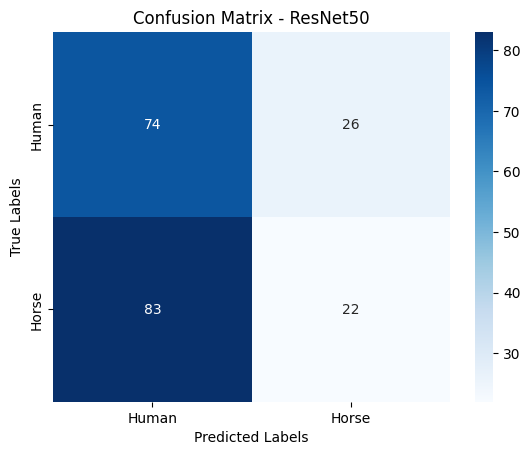

ResNet50 Test Accuracy: 46.83%


In [13]:
test_data.reset()
predictions_resnet50 = (resnet50_model.predict(test_data) > 0.5).astype("int32")

conf_matrix_resnet50 = confusion_matrix(true_labels, predictions_resnet50)
sns.heatmap(conf_matrix_resnet50, annot=True, fmt="d", cmap='Blues', xticklabels=['Human', 'Horse'], yticklabels=['Human', 'Horse'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ResNet50')
plt.show()

accuracy_resnet50 = accuracy_score(true_labels, predictions_resnet50)
print(f"ResNet50 Test Accuracy: {accuracy_resnet50 * 100:.2f}%")
